# Plot 3D power and forecasted errorbars

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import forecast as fc
import decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
forecast = fc.FisherForecast()

In [3]:
# define binning for plots
kmin_hMpc=0.01
kmax_hMpc=1.0
ks_hMpc=np.linspace(kmin_hMpc,kmax_hMpc,100)
Nk=len(ks_hMpc)
dk_hMpc=ks_hMpc[1]-ks_hMpc[0]
print('Nk =',Nk)
print('dk =',dk_hMpc)

Nk = 100
dk = 0.01


In [4]:
def z_str(z):
    return "{:.3g}".format(decimal.Decimal(z))

### Plot fixed mu (0.8<mu<1.0), for different z

3501.0 <l< 3701.0
3701.0 <l< 3901.0
3901.0 <l< 4101.0
4101.0 <l< 4301.0
4301.0 <l< 4501.0
4501.0 <l< 4701.0
4701.0 <l< 4901.0
4901.0 <l< 5101.0


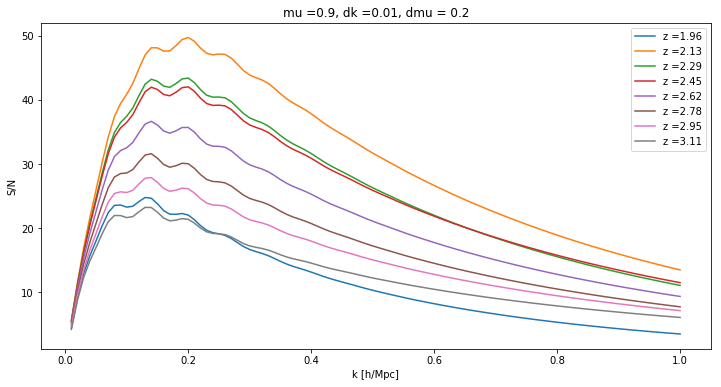

In [5]:
forecast.verbose=0
lmin=3501.0
lmax=3701.0
plt.figure(figsize=(12,6))
while lmin < 5000:
    print(lmin,'<l<',lmax)    
    forecast.lmin=lmin
    forecast.lmax=lmax
    z = forecast.mean_z()
    mu = 0.9
    dmu = 0.2
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    #P3D = forecast.LyaP3D.FluxP3D_hMpc(z,k_hMpc,mu) 
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu) for k in ks_hMpc])    
    #VarP3D = forecast.VarFluxP3D_hMpc_kmu(k_hMpc,mu,dk_hMpc,dmu)
    #print('P3D =',P3D)
    #print('VarP3D =',VarP3D)    
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='z ='+z_str(z))
    #plt.plot(ks_hMpc,np.sqrt(VarP3D),':')
    lmin = lmax 
    lmax += 200
plt.legend(loc='best')
plt.title('mu ='+str(mu)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_mu'+str(mu)+'.pdf')

### Plot fixed z, for different mu


mus [ 0.1  0.3  0.5  0.7  0.9]


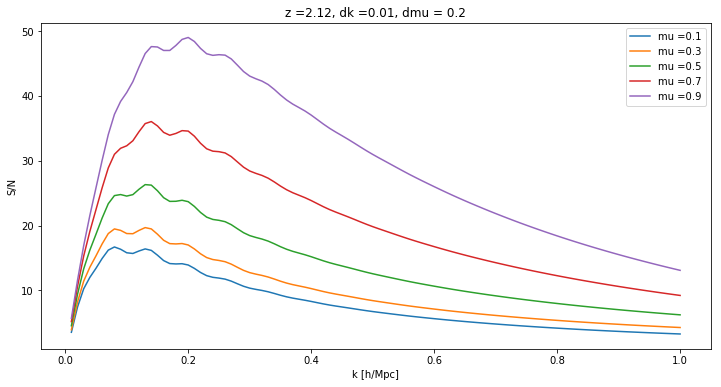

In [6]:
mus=np.linspace(0.1,0.9,5)
dmu=mus[1]-mus[0]
print('mus',mus)
forecast.lmin=3700.0
forecast.lmax=3900.0
z = forecast.mean_z()
plt.figure(figsize=(12,6))
for mu in mus:
    P3D = np.array([forecast.FluxP3D_hMpc(k,mu) for k in ks_hMpc])
    #P3D = forecast.LyaP3D.FluxP3D_hMpc(z,k_hMpc,mu) 
    VarP3D = np.array([forecast.VarFluxP3D_hMpc(k,mu,dk_hMpc,dmu) for k in ks_hMpc])    
    #VarP3D = forecast.VarFluxP3D_hMpc_kmu(k_hMpc,mu,dk_hMpc,dmu)
    #print('P3D =',P3D)
    #print('VarP3D =',VarP3D)    
    plt.plot(ks_hMpc,P3D/np.sqrt(VarP3D),label='mu ='+str(mu))
plt.legend(loc='best')
plt.title('z ='+z_str(z)+', dk ='+str(dk_hMpc)+', dmu = '+str(dmu))
plt.xlabel('k [h/Mpc]')
plt.ylabel('S/N')
plt.savefig('LyaP3D_z'+z_str(z)+'.pdf')